In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
PROJECT_PATH = Path.cwd().parent
DATA_PATH = PROJECT_PATH / "Dataset" / "cleaned_dataset.csv"

In [3]:
df= pd.read_csv(DATA_PATH)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Target Variable Analysis

In [4]:
print("Churn Distribution:")
churn_dist = df['Churn'].value_counts()
churn_pct = df['Churn'].value_counts(normalize=True) * 100

display(pd.concat([churn_dist, churn_pct], axis=1, keys=['Count', 'Percentage']))


Churn Distribution:


,Count,Percentage
Churn,,
No,5174,73.463013
Yes,1869,26.536987


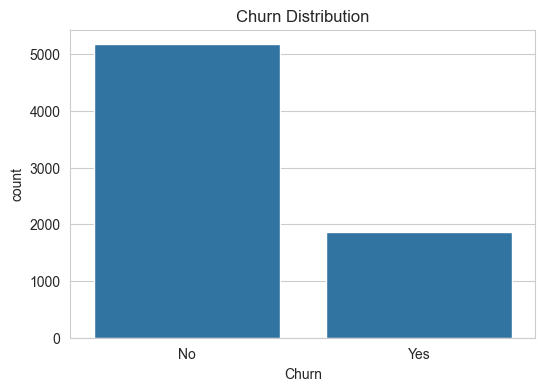

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

##### A significant proportion of customers have churned, indicating a serious retention challenge.The churn class is underrepresented compared to retained customers, highlighting class imbalance that must be considered during model evaluation. so from the graph we can say that this is an imbalanced dataset.

## Univariate Analysis


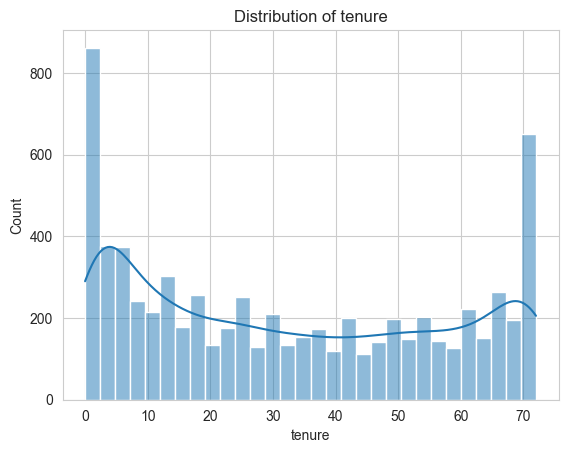

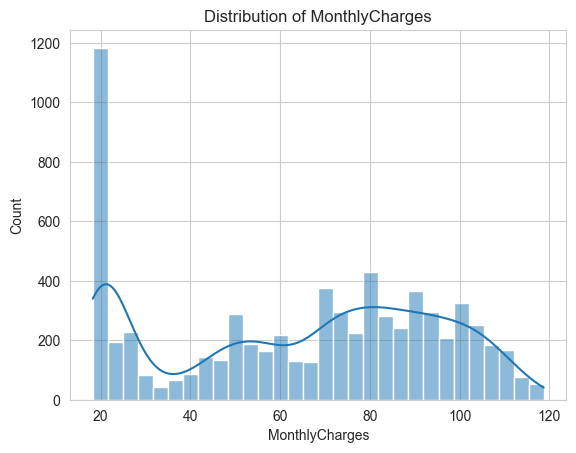

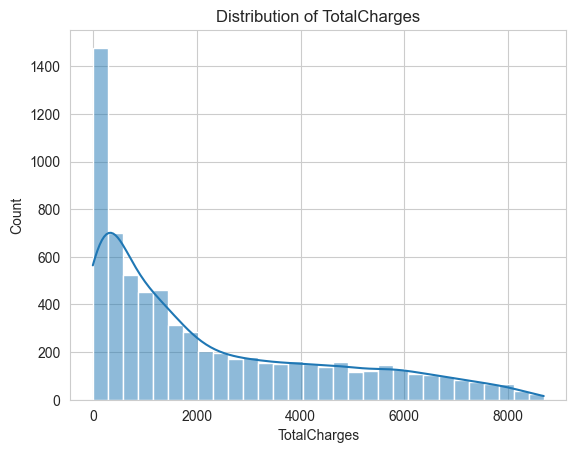

In [6]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

Tenure shows a skewed distribution with a large number of customers in early months, while MonthlyCharges and TotalCharges show wide variability, suggesting diverse pricing plans and usage patterns.  
- New customers churn more.  
- Loyal long-term customers churn less

From the Monthly Charges Distribution graph, we get that the customers churn more when the monthly charges are higher, which suggests price sensitivity and service bundle dissatisfaction.

The Total charges Distribution graph shows that it is corelated with tenure.

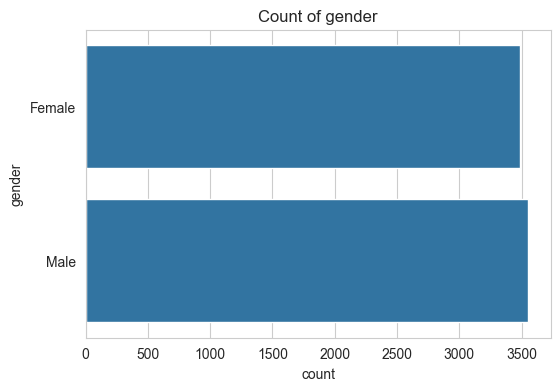

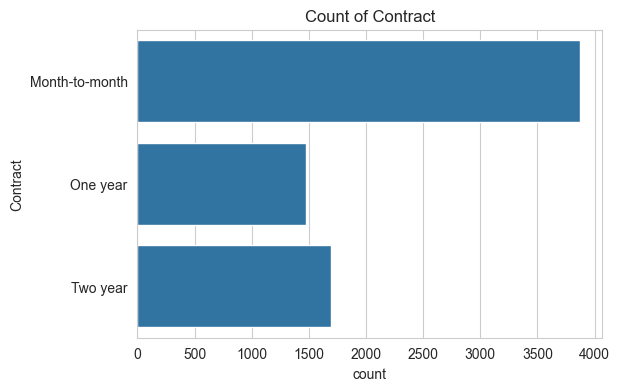

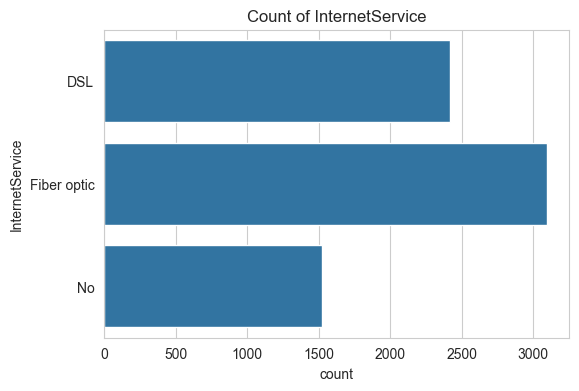

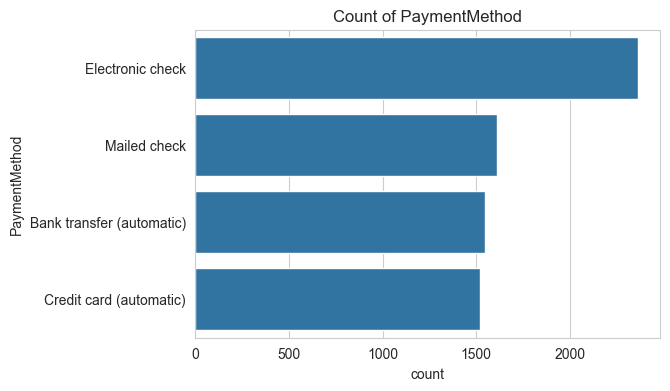

In [7]:
cat_cols = ['gender', 'Contract', 'InternetService', 'PaymentMethod']

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(y=col, data=df)
    plt.title(f'Count of {col}')
    plt.show()


* Gender is balanced, but in telecom churn datasets gender usually has very weak predictive power.

* From the Contract Type distribution , we can say that month-to-month customers churn the most and two-year contract churn the least.(This is usually the strongest churn driver)

* From the Internet Service Distribution, we get to know that Fiber optic customers usually churn more due to higher price, higher expectation, service issues.

* From the Payment Method distribution, we noticed that Electronic check users often churn more.

## Bivariate Analysis

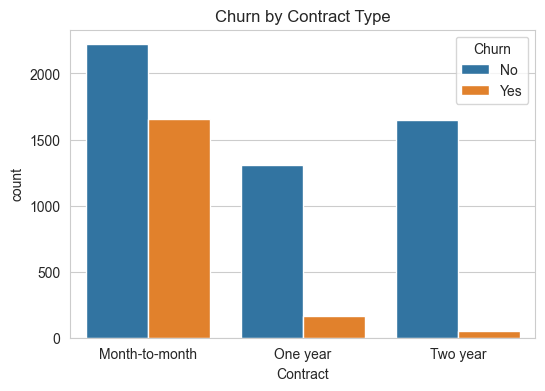

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.show()

We can see that:
- Month-to-Month shows huge churn count
- One year shows very churn count
- Two year shows exttemely low churn count  
so we can confirm one thing that is Contract Type is clearly a primary churn driver.

For Business,  
The company must push the customers toward long-term contracts

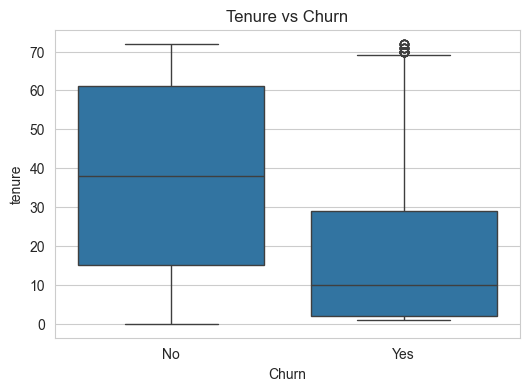

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()

we can say that,  
low tenure = high churn risk

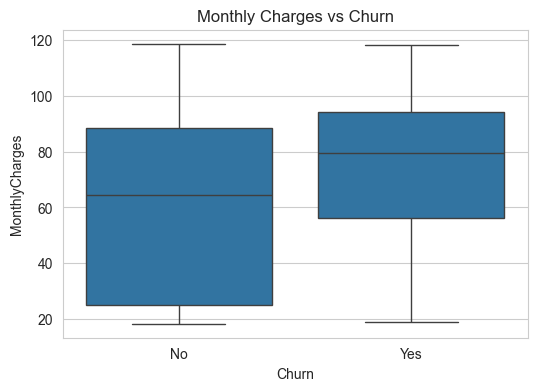

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

higher paying customers churn more.

## Multivariate Analysis

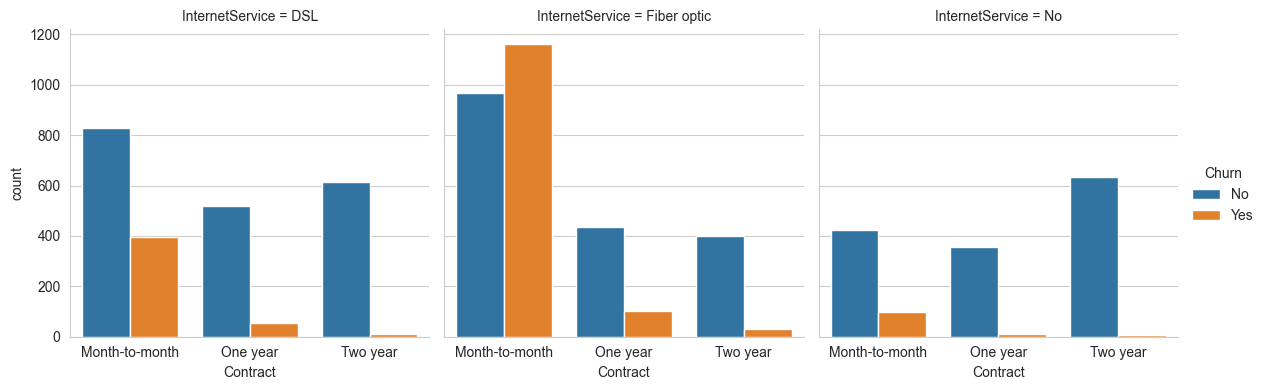

In [11]:
sns.catplot(
    x="Contract",
    hue="Churn",
    col="InternetService",
    data=df,
    kind="count",
    height=4,
    aspect=1
)
plt.show()

we can say that :
- Fiber Optic :  
    month-to-month give extremely high churn

- DSL  & No internet:\
    It has low churn rate compared to Fiber

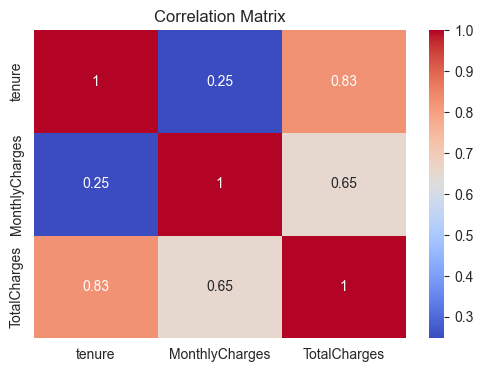

In [12]:
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Total charges is strongly dependent on tenure